In [12]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [13]:
from scipy import integrate
import warnings

# 적분에 관한 warning 출력을 하지 않는다.
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

In [14]:
x_range = [ 0, 2 ]
y_range = [ 0, 1 ]

In [15]:
def f_xy( x, y):
    if 0 <= y <= 1 and 0<= x -y <=1:
        return 4 * y * (x-y)
    else:
        return 0


In [16]:
XY = [ x_range, y_range, f_xy]

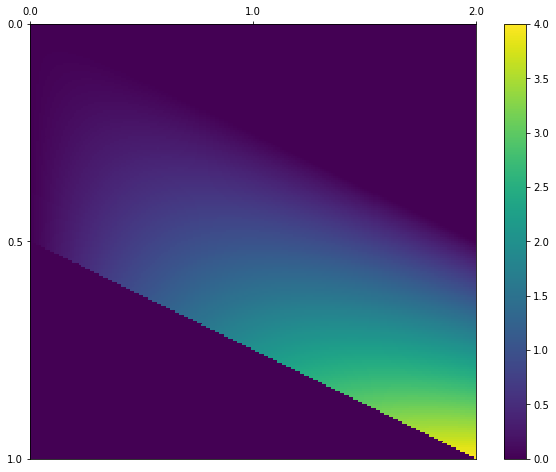

In [17]:
# 결합확률밀도함수를 히트맵으로 그려봄

xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array ([[ f_xy (x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)

ax.set_xticks(np.linspace( 0, 200, 3) , minor =False )
ax.set_yticks(np.linspace( 0, 200, 3) , minor =False )

ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [18]:
# 다중적분

integrate.nquad ( f_xy,
                 [ [ -np.inf, np.inf],
                   [ -np.inf, np.inf] ] )[0]

1.000

In [19]:
# 주변 확률 밀도 함수 
# 변수 X만의 움직임, 즉 확률변수 X의 밀도함수 => 주변 밀도함수

from functools import partial

def f_X(x):
    return integrate.quad( partial (f_xy, x) , -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad( partial (f_xy, y =y ) , -np.inf, np.inf)[0]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36794 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38306 missing from current font.
  font.set_

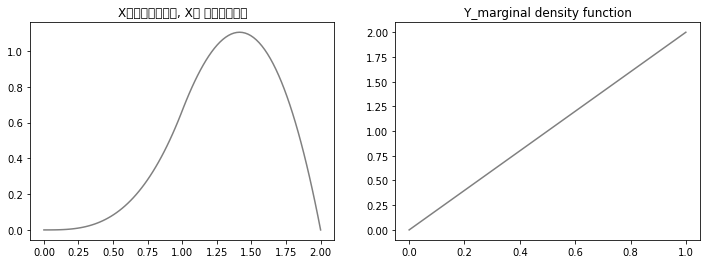

In [20]:
#각각의 밀도함수를 그려봄


xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=( 12, 4 ))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('Xの周辺密度関数, X의 주변밀도함수')
ax2.set_title('Y_marginal density function')

plt.show()

In [22]:
# 기댓값 
# x와 밀도함수의 곲을 x와 y로 적분하여 구한다.

def integrand ( x, y):
    return x * f_xy( x, y)

integrate.nquad ( integrand,
                  [ [ -np.inf, np.inf],
                    [ -np.inf, np.inf] ] ) [0]

1.333

In [23]:
# 일반함수 g(X,Y)의 기댓값
#  E( g(X,Y) )

def E( XY, g):
    x_range, y_range, f_xy =  XY
    def integrand ( x, y):
        return g(x,y) * f_xy (x,y)

    return integrate.nquad ( integrand,
                            [[ -np.inf, np.inf] ,
                             [ -np.inf ,np.inf] ]) [0]

In [24]:
mean_X = E (XY, lambda x, y: x)
mean_X

1.333

In [25]:
mean_Y = E (XY, lambda x, y: y)
mean_Y

0.667

In [26]:
# 분산

def integrand (x, y):
    return ( x - mean_X) **2 * f_xy( x, y)

integrate.nquad ( integrand,
                  [[ -np.inf, np.inf] ,
                             [ -np.inf ,np.inf] ]) [0]

0.111

In [27]:
# 일반함수 g(X,Y)의 분산
#  V( g(X,Y) )

def V( XY, g):
    x_range, y_range, f_xy =  XY
    mean = E( XY, g)
    def integrand ( x, y):
        return  (g(x,y) - mean )**2 * f_xy (x,y)

    return integrate.nquad ( integrand,
                            [[ -np.inf, np.inf] ,
                             [ -np.inf ,np.inf] ]) [0]

In [28]:
# X의 분산

var_X = V (XY, lambda x, y:x )
var_X

0.111

In [29]:
# Y의 분산

var_Y = V (XY, lambda x, y:y )
var_Y

0.056

In [30]:
# X, Y 변수 사이의 공분산

def Cov( XY):
    x_range, y_range, f_xy =  XY
    mean_X = E( XY, lambda x, y:x )
    mean_Y = E( XY, lambda x, y:y )
    def integrand ( x, y):
        return  (x- mean_X) * (y- mean_Y) * f_xy (x,y)

    return integrate.nquad ( integrand,
                            [[ -np.inf, np.inf] ,
                             [ -np.inf ,np.inf] ]) [0]

In [31]:
Cov(XY)

0.056

In [33]:
# 상관계수

Cov(XY) / np.sqrt (var_X * var_Y)

0.707